No handles with labels found to put in legend.


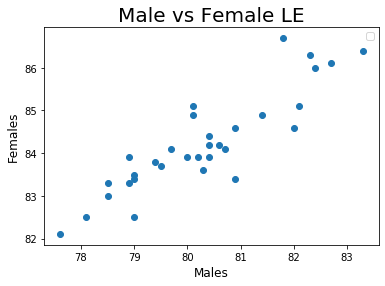

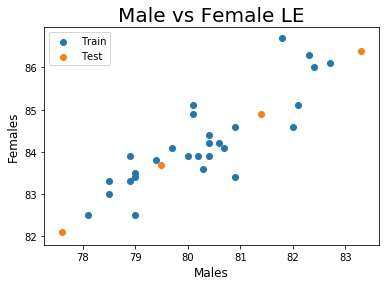

In [91]:
from sklearn import model_selection, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read london data and plot

df = pd.read_csv('./data/data.csv',encoding='latin1',delimiter=',')

x = np.roll(df.iloc[:,70][2:].astype(float),-2).reshape(-1,1)

y = np.roll(df.iloc[:,71][2:].astype(float),-2).reshape(-1,1)

plt.scatter(x, y) 

plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE', fontsize = 20) 
plt.legend() 
plt.show() 

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.1)

plt.scatter(x_train, y_train, label = 'Train') 
plt.scatter(x_test, y_test, label = 'Test') 
  
plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE', fontsize = 20) 
plt.legend() 
plt.show() 

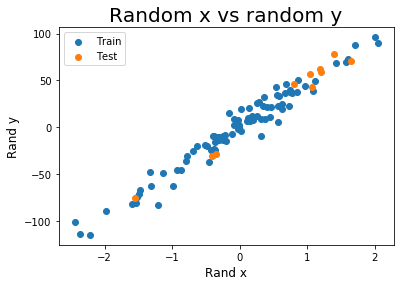

In [92]:
# Synthetic data

xx,yy,p = datasets.make_regression(n_samples=100,n_features=1,n_informative=1,noise=10,coef=True)

xx_train, xx_test, yy_train, yy_test = model_selection.train_test_split(xx,yy,test_size=0.1)

plt.scatter(xx_train, yy_train, label = 'Train') 
plt.scatter(xx_test, yy_test, label = 'Test') 

plt.xlabel('Rand x', fontsize = 12) 
plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Random x vs random y', fontsize = 20) 
plt.legend() 
plt.show() 

In [93]:
# Define functions for regression

def grad(iter,x,w,y,a):
    M = len(x)
    for i in range(iter):
        for j in range(M):
            yh = w[0] + w[1] * x[j]
            eps = y[j]-yh
            w[0]=w[0]+a*eps*(1/M)
            w[1]=w[1]+a*eps*x[j]*(1/M)
    return w

def err(x,w,y):
    e = 0
    M = len(x)
    for j in range(M):
        yh = w[0] +w[1]*x[j]
        e += (y[j]-yh)**2
    e/=M 
    return e

def r2(x,w,y):
    u = 0
    v = 0
    r2 = 0
    M = len(x)
    ym = np.mean(y)
    for j in range(M):
        yh = w[0] +w[1]*x[j]
        u += (y[j]-yh)**2
        v += (y[j]-ym)**2
    r2 = 1-(u/v)
    return r2

Training results:
Error: [0.58251086]
R2: [0.48176013]


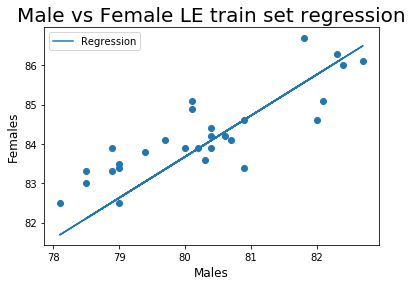

Testing results:
Error: [0.58353995]
R2: [0.76582295]


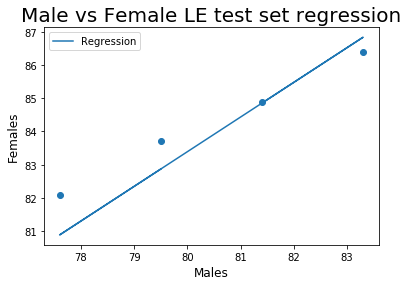

In [94]:
## For london dataset

# Training

w = [0.0,0.0]
w = grad(100,x_train,w,y_train,0.001)

print("Training results:")

print(f'Error: {err(x_train,w,y_train)}')
print(f'R2: {r2(x_train,w,y_train)}')

plt.scatter(x_train, y_train) 
plt.plot(x_train, w[0]+w[1]*x_train, label = 'Regression') 

plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE train set regression', fontsize = 20) 
plt.legend() 
plt.show() 

#Testing

w = [0.0,0.0]
w = grad(100,x_test,w,y_test,0.001)
print("Testing results:")

print(f'Error: {err(x_test,w,y_test)}')
print(f'R2: {r2(x_test,w,y_test)}')

plt.scatter(x_test, y_test) 
plt.plot(x_test, w[0]+w[1]*x_test, label = 'Regression') 

plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE test set regression', fontsize = 20) 
plt.legend() 
plt.show()

Training results:
Error: [1677.35843298]
R2: [0.14791506]


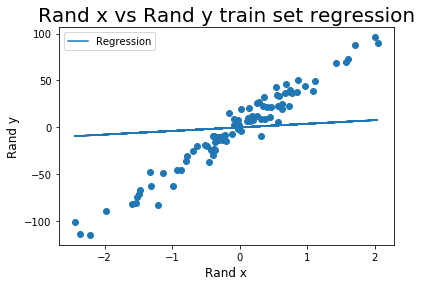

Testing results:
Error: [2451.00069048]
R2: [0.02750836]


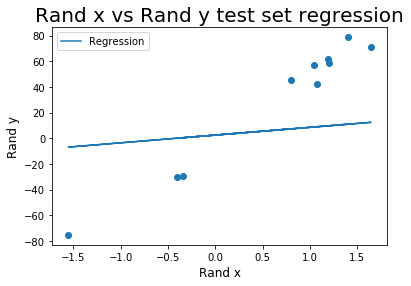

In [95]:
## For synthetic dataset

# Training

w = [0.0,0.0]
w = grad(100,xx_train,w,yy_train,0.001)

print("Training results:")

print(f'Error: {err(xx_train,w,yy_train)}')
print(f'R2: {r2(xx_train,w,yy_train)}')

plt.scatter(xx_train, yy_train) 
plt.plot(xx_train, w[0]+w[1]*xx_train, label = 'Regression') 

plt.xlabel('Rand x', fontsize = 12) 
plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Rand x vs Rand y train set regression', fontsize = 20) 
plt.legend() 
plt.show() 

#Testing

w = [0.0,0.0]
w = grad(100,xx_test,w,yy_test,0.001)
print("Testing results:")

print(f'Error: {err(xx_test,w,yy_test)}')
print(f'R2: {r2(xx_test,w,yy_test)}')

plt.scatter(xx_test, yy_test) 
plt.plot(xx_test, w[0]+w[1]*xx_test, label = 'Regression') 

plt.xlabel('Rand x', fontsize = 12) 
plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Rand x vs Rand y test set regression', fontsize = 20) 
plt.legend() 
plt.show() 

y=[27.52584152]+[0.70643725]x
r2=0.7162013386650868, MSE=0.31899476317368
Training results:


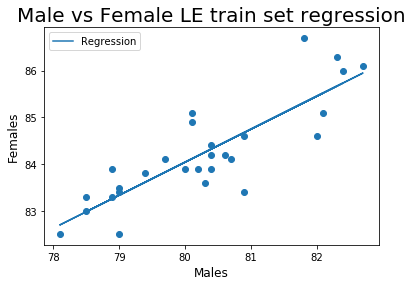

Testing results:


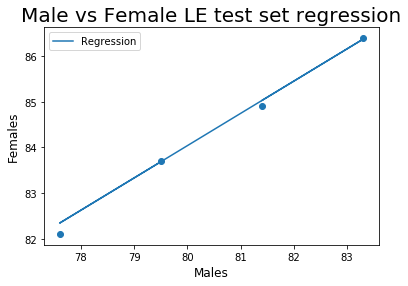

In [96]:
# Using sklearn regression

from sklearn import linear_model
from sklearn import metrics

# For london dataset:

lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
w = [lr.intercept_,lr.coef_[0]]
print(f'y={w[0]}+{w[1]}x')
# Train
y_hat = lr.predict(x_train)
print(f'r2={metrics.r2_score(y_train,y_hat)}, MSE={metrics.mean_squared_error(y_train,y_hat)}')

print("Training results:")

plt.scatter(x_train, y_train) 
plt.plot(x_train, w[0]+w[1]*x_train, label = 'Regression') 

plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE train set regression', fontsize = 20) 
plt.legend() 
plt.show() 
# Test
y_hat = lr.predict(x_test)

print("Testing results:")

plt.scatter(x_test, y_test) 
plt.plot(x_test, w[0]+w[1]*x_test, label = 'Regression') 

plt.xlabel('Males', fontsize = 12) 
plt.ylabel('Females', fontsize = 12) 
  
plt.title('Male vs Female LE test set regression', fontsize = 20) 
plt.legend() 
plt.show()



y=0.5835656509683671+47.3395842296263x
r2=0.95953621865161, MSE=79.65434146332811
Training results:


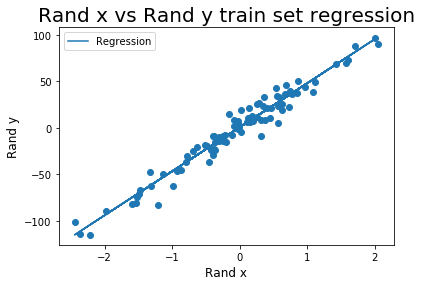

Testing results:


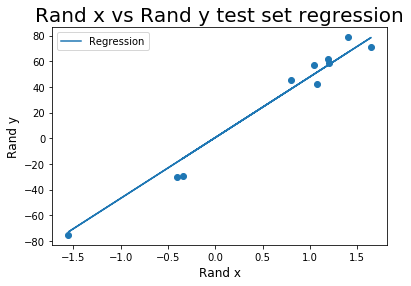

In [97]:
# For synthetic dataset:

lr2 = linear_model.LinearRegression()
lr2.fit(xx_train,yy_train)
w = [lr2.intercept_,lr2.coef_[0]]
print(f'y={w[0]}+{w[1]}x')
# Train
y_hat = lr2.predict(xx_train)
print(f'r2={metrics.r2_score(yy_train,y_hat)}, MSE={metrics.mean_squared_error(yy_train,y_hat)}')

print("Training results:")

plt.scatter(xx_train, yy_train) 
plt.plot(xx_train, w[0]+w[1]*xx_train, label = 'Regression') 

plt.xlabel('Rand x', fontsize = 12) 
plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Rand x vs Rand y train set regression', fontsize = 20) 
plt.legend() 
plt.show() 
# Test
y_hat = lr2.predict(xx_test)

print("Testing results:")

plt.scatter(xx_test, yy_test) 
plt.plot(xx_test, w[0]+w[1]*xx_test, label = 'Regression') 

plt.xlabel('Rand x', fontsize = 12) 
plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Rand x vs Rand y test set regression', fontsize = 20) 
plt.legend() 
plt.show()

No handles with labels found to put in legend.


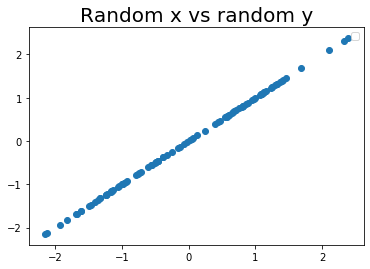

In [100]:
# Linear classification with a perceptron (not finished)

a,b = datasets.make_classification(n_features=1,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class=1,n_samples=100)

# a_train, a_test, b_train, b_test = model_selection.train_test_split(a,b,test_size=0.1)

plt.scatter(a, a) 
# plt.scatter(xx_test, yy_test, label = 'Test') 

# plt.xlabel('Rand x', fontsize = 12) 
# plt.ylabel('Rand y', fontsize = 12) 
  
plt.title('Random x vs random y', fontsize = 20) 
plt.legend() 
plt.show() 

